Imports

In [1]:
import numpy as np
from helpers import create_band_matrix,create_forcing_matrix
from matrix_algorithms import solve_jacobi,solve_gauss_seidel, OutputSolution
import matplotlib.pyplot as plt
import os

In [2]:
# Glocal variables & config

OUTPUT_DOCS_PATH="../docs"

if not os.path.exists(OUTPUT_DOCS_PATH):
    os.makedirs(OUTPUT_DOCS_PATH)


Exercise A

Create a system of equations for a1=5+e, where e is the fourth digit of your index,
a2=a3=-1.The size of the matrix N is defined in section 2 of this manual. b is a vector
of length N, whose first element is the value of sin(n-(f+1)), where f is the third digit of your index.

In [3]:

index = 197839

thrid_digit = index // 1000 % 10 # 3rd digit of index
fourth_digit = index // 100 % 10 # 4th digit of index

before_last = index // 10 % 10 # before last digit of index
last_digit = index % 10 # last digit of index

a1 = 5 + fourth_digit# a1 = 5 + 4th digit of index
a2 = a3 = -1 

N = 1200 + 10 * before_last + last_digit

A = create_band_matrix(a1,a2,a3, N) 
b = create_forcing_matrix(N, thrid_digit + 1)

print(A)
print(b)


[[13 -1 -1 ...  0  0  0]
 [-1 13 -1 ...  0  0  0]
 [-1 -1 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 13 -1 -1]
 [ 0  0  0 ... -1 13 -1]
 [ 0  0  0 ... -1 -1 13]]
[[ 0.98935825]
 [ 0.91794788]
 [ 0.3781055 ]
 ...
 [ 0.96749073]
 [-0.72202085]
 [-0.69618518]]


Exercise B
Implement iterative methods for solving systems of linear equations:
Jacobi and Gauss-Seidel. Describe how many iterations each method needs to determine the
solution of the system of equations from task A,assuming that the condition for completing the calculation
is to achieve a residuum norm of less than 10^-9.For both methods, show on the graph
how the norm of the residuum changes in successive iterations performed to determine the
solution(y-axis on a logarithmic scale).Compare the running times of both algorithms.

Iterations: 23
Errors: [inf, np.float64(97.55967811123678), np.float64(29.990534680570118), np.float64(9.222587453587593), np.float64(2.836458887091071), np.float64(0.8724264848032874), np.float64(0.2683487264300422), np.float64(0.08254360768688203), np.float64(0.025390866711801803), np.float64(0.007810516819781792), np.float64(0.002402640357696539), np.float64(0.0007391004415317309), np.float64(0.0002273647046946799), np.float64(6.994342398981276e-05), np.float64(2.151664108123784e-05), np.float64(6.6191982542676615e-06), np.float64(2.036288377130135e-06), np.float64(6.26434782767461e-07), np.float64(1.9271471878247106e-07), np.float64(5.92865441823723e-08), np.float64(1.8238933057119145e-08), np.float64(5.6110559874878305e-09), np.float64(1.7262016099605158e-09), np.float64(5.310557403089412e-10)]
Time: 33.60236477851868
Iterations: 16
Errors: [np.float64(57.69054235797828), np.float64(10.47822553267532), np.float64(1.9036792901819448), np.float64(0.3458883888986374), np.float64(0.06

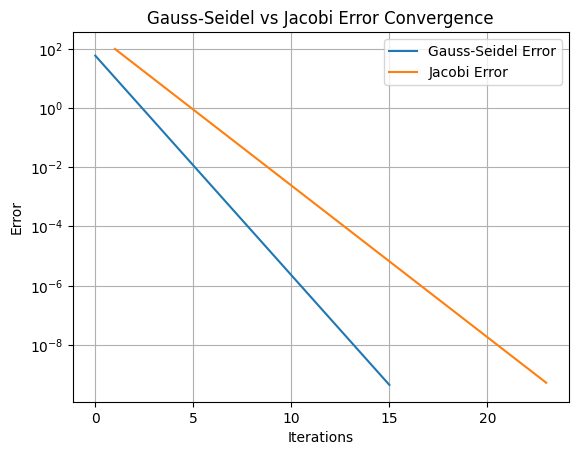

In [ ]:
jacobi:OutputSolution = solve_jacobi(A, b)

print("Iterations:", jacobi.iterations)
print("Errors:", jacobi.errors)
print("Time:", jacobi.time)

gauss:OutputSolution = solve_gauss_seidel(A, b)

print("Iterations:", gauss.iterations)
print("Errors:", gauss.errors)
print("Time:", gauss.time)

plt.plot(gauss.errors, label='Gauss-Seidel Error')
plt.plot(jacobi.errors, label='Jacobi Error')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Residual Norm')
plt.title('Gauss-Seidel vs Jacobi Error Convergence')
plt.grid()
plt.legend()
plt.savefig(f"{OUTPUT_DOCS_PATH}/gauss_seidel_errors.png")
plt.show()


